 **Group Members:**

• Sharon Owino - 166419

• Benard Ogol - 188664

• Adeline Makokha - 191199

• Victor Radeny - 119368


# "Comparative Analysis of Parametric, Nonparametric, and Machine Learning Models for Predicting California Housing Prices"

**Goal:** Predict median house values based on features including location (longitude/latitude), income, and housing metrics.

**Research Q1:** Can nonlinear ensemble models (e.g., Random Forest, XGBoost, Neural Nets) outperform others in accuracy?

**Research Q2:** Which model family performs best overall: Generalized Nonparametric Regression (GNPR), parametric (linear/logistic regression), or ML (e.g., XGBoost, RF)?

**Additional:** Identify nonlinear interactions between location and income.



## Dataset Overview

The dataset includes the following features:

**Longitude:** The geographic coordinate representing east-west position.                          
**Latitude:** The geographic coordinate representing north-south position.                                
**Housing Median Age:** The median age of houses in the area.         
**Total Rooms:** The total number of rooms in the houses.               
**Total Bedrooms:** The total number of bedrooms in the houses.           
**Population**: The population living in the area.                
**Households:** The number of households.             
**Median Income:** The median income of the area.                     
**Median House Value:** The target variable representing the price of the houses.

## Import Packages

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
thinc 8.3.6 r

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from pygam import LinearGAM, s, f
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
import shap
import pickle
import seaborn as sns


## Load the dataset

In [ ]:
url = "https://raw.githubusercontent.com/benard3360-star/Patient-Condition-Predict/master/Housing_data.csv"
df = pd.read_csv(url)
print(df.head().to_string())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
0    -122.23     37.88                  41          880             129         322         126         8.3252            452600.0
1    -122.22     37.86                  21         7099            1106        2401        1138         8.3014            358500.0
2    -122.24     37.85                  52         1467             190         496         177         7.2574            352100.0
3    -122.25     37.85                  52         1274             235         558         219         5.6431            341300.0
4    -122.25     37.85                  52         1627             280         565         259         3.8462            342200.0


In [ ]:
# column_names = ["longitude", "latitude", "housing_median_age",
                    "total_rooms", "total_bedrooms", "population",
                    "households", "median_income", "median_house_value"]
df.columns = column_names
df.head()

In [ ]:
df.shape

(20640, 9)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Observation:**  statistics for the target variable median_house_value.

## Inspecting median_house_value

In [ ]:
print(df['median_house_value'].describe())

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


**Observation:**

The median_house_value variable has a wide range of different house prices, suggesting that the dataset captures a diverse set of housing prices.

 - The mean ( 206855.816909) is higher than 50% percentile (179700.0000)


## Assess the distribution of the median_house_value

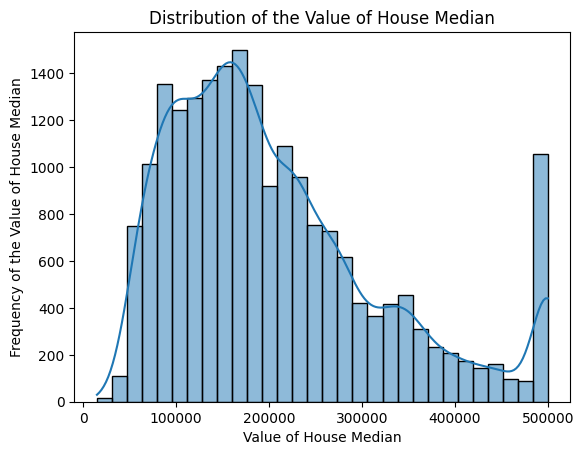

In [ ]:
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribution of the Value of House Median')
plt.xlabel('Value of House Median')
plt.ylabel('Frequency of the Value of House Median')
plt.show()

 **Observation:**

 - The distribution is right-skewed – many houses have lower to mid-range values, with a tail extending to the higher prices. This may affect model performance and may require transformations or special handling (e.g., log transformation) to improve model accuracy.

 - The range between the min and max suggest presence of outliers.

## Assess the distribution of the median_house_value using boxplot

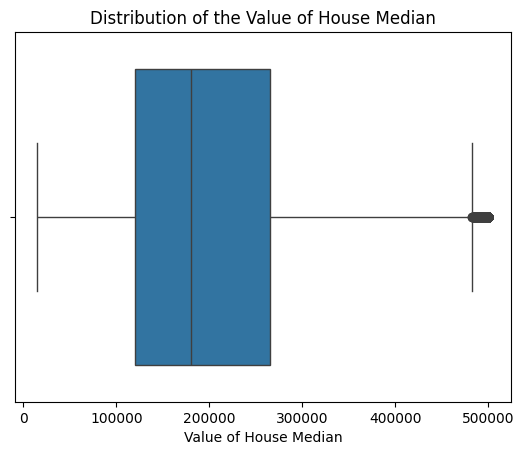

In [ ]:
sns.boxplot(x=df['median_house_value'])
plt.title('Distribution of the Value of House Median')
plt.xlabel('Value of House Median')
plt.show()

**Observation:**

This identifies outliers in median_house_value using the interquartile range rule. A significant number of houses have values well above 500,000.




## Identify Outliers using IQR Method

In [ ]:
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 1071


Most of these are high-end values above the upper bound. Recognizing that ~1071 districts have unusually high house prices, the analysis proceeds to handle them, since outliers can skew a regression line.

Adele

## Log Transformation

In [ ]:
from logging import log
df['log_median_house_value'] = np.where(
    df['median_house_value'] > upper_bound,
    upper_bound,
    df['median_house_value'])

df['log_median_house_value'] = np.log1p(df['log_median_house_value'])


**Observation:**

This transformation often makes linear models more applicable by stabilizing variance and making relationships more linear.

## Plotting Boxplot to Check for the Outliers

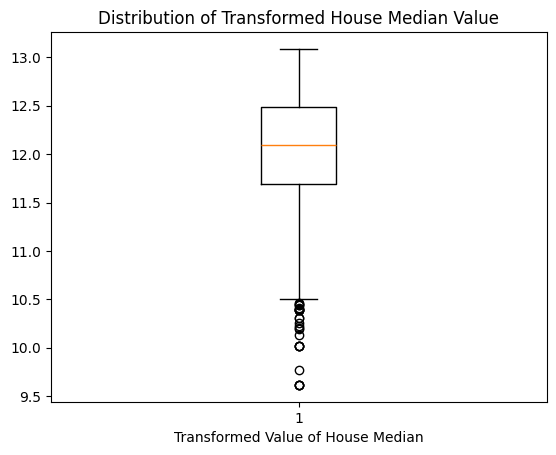

In [ ]:
plt.boxplot(df['log_median_house_value'])
plt.title("Distribution of Transformed House Median Value")
plt.xlabel("Transformed Value of House Median")
plt.show()

 **Observation:**

 Capping and log-transforming has made the target distribution more symmetric and reduced outlier influence, which means that the mean and the median are approximately the same.

## Correlation with other Columns

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix['median_house_value'])

longitude                -0.045967
latitude                 -0.144160
housing_median_age        0.105623
total_rooms               0.134153
total_bedrooms            0.050594
population               -0.024650
households                0.065843
median_income             0.688075
median_house_value        1.000000
log_median_house_value    0.946009
Name: median_house_value, dtype: float64


**Observation:**

These correlations provide intuition for model feature importance – we anticipate models to heavily utilize median_income.

**Median Income: 0.688000**:

Strong positive correlation, indicating that higher median income levels are associated with higher house values. This suggests median income of a district is a strong predictor of house prices (wealthier neighborhoods have more expensive houses).

## Bivariate Analysis

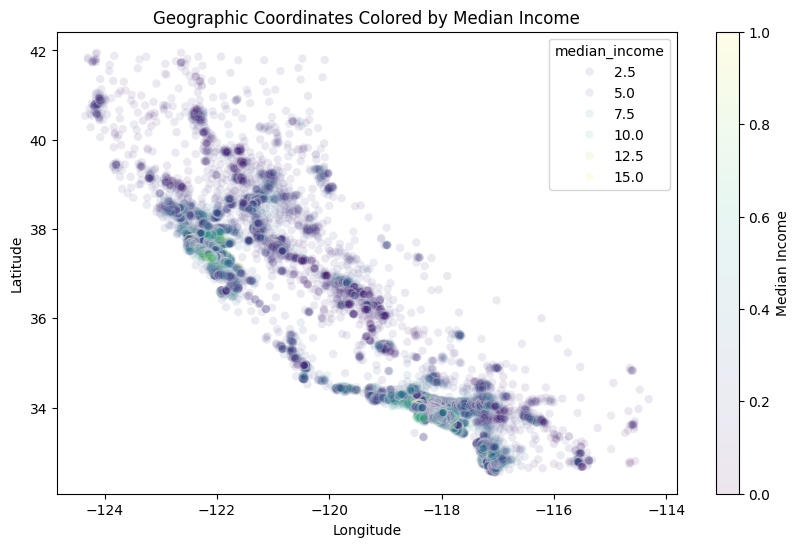

In [ ]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_income", alpha=0.1, palette="viridis")
plt.title("Geographic Coordinates Colored by Median Income")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter_plot.collections[0], label="Median Income")
plt.show()

**Observation:**

The scatter shows a distinct ceiling effect due to the cap, and a curvature in the relationship.

**Lower Median Income (Green):**

Areas with lower median income are represented by lighter green shades.
These visuals appear concentrated in the lower parts of the plot.

**Higher Median Income (Purple):**

Higher income areas are denoted with darker purple shades.
These shades appear more frequently in the northern section of the plot.

**Density of Points:**

The density of points varies, with certain clusters indicating areas of high concentration of similar income levels.

More intense color saturation hints at more significant population clusters or more data points in those specific regions relative to others.

## Visualizing house prices geographically

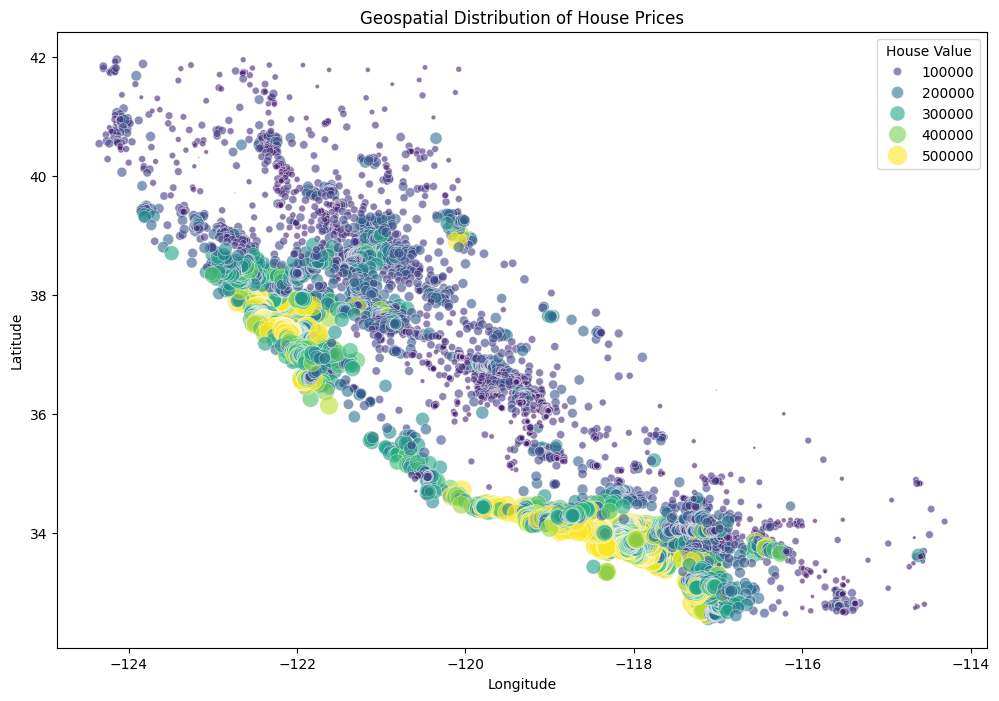

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='viridis', size='median_house_value', sizes=(1, 200), alpha=0.6)
plt.title("Geospatial Distribution of House Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right', title='House Value')
plt.show()


This indicates location is a significant factor: proximity to the coast or urban centers correlates with higher prices. The pattern is complex (non-linear in latitude/longitude)

In [ ]:
# pip install plotly


## Location verses population

In [ ]:
px.scatter(df, x="latitude", y="longitude", color="population", title="Location vs Population")

**Density Distribution:**

Populations seem to cluster in two specific areas, with one cluster towards the left between(-116, 32) and (-120, 34.3) and the other between (-120,37) and (-124, 39)with higher points representing higher populations as we move to higher latitudes.

The population is sparse in areas with fewer points.

## Create a map visualization For the Distribution

In [ ]:
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="median_income",
                        hover_data=["median_house_value", "population"],
                        color="median_house_value",
                        size="population",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=4,
                        height=600,
                        title="California Housing Data Geographic Distribution")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


**Geographical Insights:**

There seems to be a trend where higher median income correlates with upper geographical points, particularly closer to the Bay Area.
Conversely, lower median income regions appear more prominent in southern and central areas, indicating possible socio-economic disparities.

Victor

## Feature Engineering

- **rooms_per_household**: average number of rooms per household in a district.

- **bedrooms_per_room**: the proportion of rooms that are bedrooms (a measure of housing density or crowding).

- **population_per_household**: average number of people per household.

In [ ]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

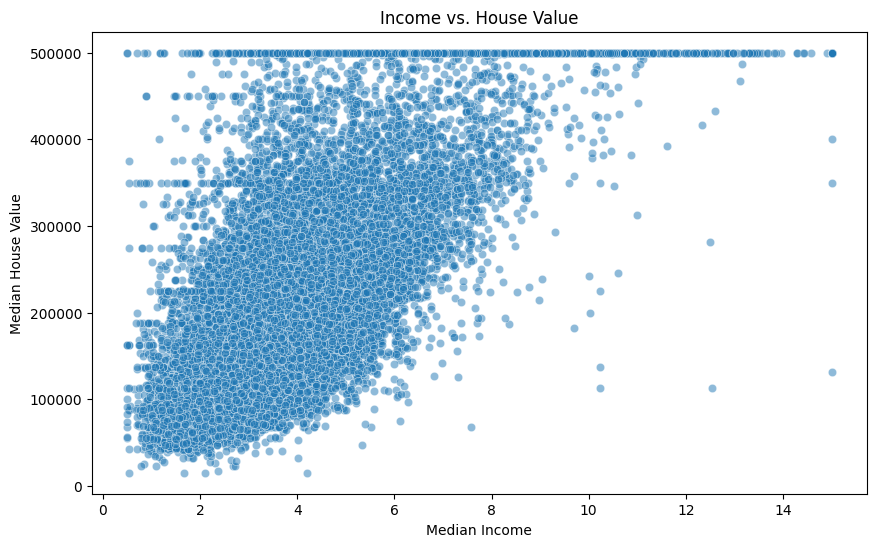

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.5)
plt.title("Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


**Observation:**

These ratios often have more predictive power than the raw totals. For instance, bedrooms_per_room indicates how crowded or partitioned houses are (a high value might indicate smaller, overcrowded homes which could affect value negatively). rooms_per_household measures space per family (more rooms per household might mean larger homes, potentially higher value).

## Create bins for median income and location

<ipython-input-22-33101adc2aed>:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



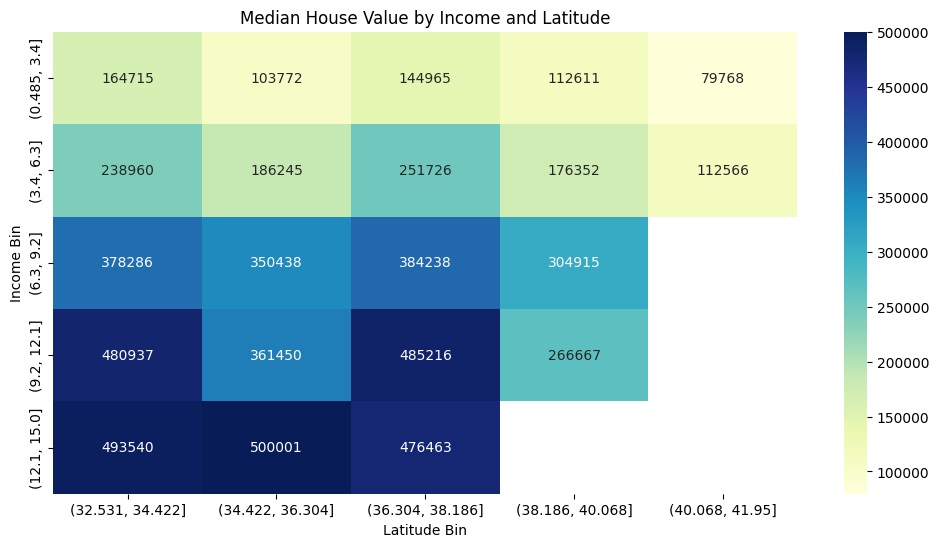

In [ ]:
df['income_bin'] = pd.cut(df['median_income'], bins=5)
df['lat_bin'] = pd.cut(df['latitude'], bins=5)
pivot_table = df.pivot_table(values='median_house_value', index='income_bin', columns='lat_bin', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Median House Value by Income and Latitude')
plt.xlabel('Latitude Bin')
plt.ylabel('Income Bin')
plt.show()


**Observation:**

The resulting heatmap (with color indicating price and annotated with values) clearly shows that higher-income bins have higher house values across all lower latitudes. It is also likely shows a latitude trend: for a given income level, certain latitude bins (e.g., those capturing coastal/urban areas in the mid-latitudes of California) have higher prices than others.

In [ ]:
df.drop(columns=['income_bin', 'lat_bin'], inplace=True)

## Feature Selection

In [ ]:
X = df.drop(columns=['median_house_value', 'log_median_house_value'])
y = df['log_median_house_value']
X_const = sm.add_constant(X)

## OLS Backward Search

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while True:
        X_with_const = sm.add_constant(X[features])
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues.iloc[1:]
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Dropping '{excluded_feature}' (p-value: {max_p_value:.4f})")
            features.remove(excluded_feature)
        else:
            break
    return model, features


In [ ]:
model, selected_features = backward_elimination(X, y)


Dropping 'total_rooms' (p-value: 0.5662)
Dropping 'population_per_household' (p-value: 0.0822)


In [ ]:
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     log_median_house_value   R-squared:                       0.647
Model:                                OLS   Adj. R-squared:                  0.647
Method:                     Least Squares   F-statistic:                     4204.
Date:                    Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                            18:17:18   Log-Likelihood:                -6786.4
No. Observations:                   20640   AIC:                         1.359e+04
Df Residuals:                       20630   BIC:                         1.367e+04
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

**Observation:**

The model explains about 64.7% of variability in the dataset in log house value. These selected features will be used for training the linear regression model and some others, ensuring we focus on the most relevant predictors.

In [ ]:
summary_df = pd.DataFrame({
    'feature': model.params.index,
    'coefficient': model.params.values,
    'p_value': model.pvalues.values,
    't_stat': model.tvalues.values,
    'std_err': model.bse.values
})

summary_df = summary_df[summary_df['feature'] != 'const']
summary_df = summary_df.sort_values(by='p_value')

print(summary_df)


               feature  coefficient        p_value      t_stat   std_err
1            longitude    -0.276337   0.000000e+00  -78.659048  0.003513
2             latitude    -0.279730   0.000000e+00  -83.601221  0.003346
7        median_income     0.180007   0.000000e+00  103.231190  0.001744
5           population    -0.000181  3.259586e-274  -35.925797  0.000005
9    bedrooms_per_room     1.053987   8.065840e-76   18.502715  0.056964
3   housing_median_age     0.003198   9.919318e-53   15.326594  0.000209
8  rooms_per_household     0.017409   3.196299e-45   14.146460  0.001231
6           households     0.000541   1.790884e-40   13.348017  0.000041
4       total_bedrooms     0.000074   2.402787e-02    2.256850  0.000033


In [ ]:
print(selected_features)

['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room']


In [ ]:
selected_features = ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households',
                     'median_income', 'rooms_per_household', 'bedrooms_per_room','total_rooms']
X_selected = df[selected_features]
y = df['log_median_house_value']
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

## Define Evaluation metrics

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


computes common regression metrics to evaluate model performance. For a given set of true values y_true and model predictions y_pred,

Bernard

## Fit Models

### Gaussian Process Regression (with RBF kernel)

In [ ]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# kernel = C(1.0, (1e-3, 1e3)) * RBF()
# gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
# gpr.fit(X_train, y_train)
# gpr_pred = gpr.predict(X_test)
# gpr_results = evaluate_model(y_test, gpr_pred)


## GAM

In [ ]:
from pygam import LinearGAM, s

gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
gam.gridsearch(X_train.values, y_train.values)
gam_pred = gam.predict(X_test.values)
gam_results = evaluate_model(y_test, gam_pred)


100% (11 of 11) |########################| Elapsed Time: 0:00:40 Time:  0:00:40


## Kernel Regression

In [ ]:
# from statsmodels.nonparametric.kernel_regression import KernelReg

# kr = KernelReg(endog=[y_train], exog=X_train.values, var_type='c' * X_train.shape[1])
# kr_pred, _ = kr.fit(X_test.values)
# kr_results = evaluate_model(y_test, kr_pred)


## LOESS (LOWESS)

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

loess_result = lowess(endog=y_train, exog=X_train.iloc[:, 0], frac=0.3)  # Using first feature
loess_pred = np.interp(X_test.iloc[:, 0], loess_result[:, 0], loess_result[:, 1])
loess_results = evaluate_model(y_test, loess_pred)


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_results = evaluate_model(y_test, lr_pred)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_results = evaluate_model(y_test, rf_pred)


## XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_results = evaluate_model(y_test, xgb_pred)


## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_results = evaluate_model(y_test, mlp_pred)


## Combine and compare Results

In [ ]:
results_df = pd.DataFrame({
    'Model': [
        'GAM','LOESS','Linear Regression',
        'Random Forest', 'XGBoost', 'Neural Net (MLP)'
    ],
    'MAE': [
        gam_results['MAE'], lr_results['MAE'],
        loess_results['MAE'], rf_results['MAE'],
        xgb_results['MAE'], mlp_results['MAE']
    ],
    'MSE': [
        gam_results['MSE'], lr_results['MSE'],
        loess_results['MSE'], rf_results['MSE'],
        xgb_results['MSE'], mlp_results['MSE']
    ],
    'RMSE': [
        gam_results['RMSE'], lr_results['RMSE'],
        loess_results['RMSE'], rf_results['RMSE'],
        xgb_results['RMSE'], mlp_results['RMSE']
    ],
    'R²': [
        gam_results['R2'], lr_results['R2'],
        loess_results['R2'], rf_results['R2'],
        xgb_results['R2'], mlp_results['R2']
    ]
})

print(results_df.sort_values(by="R²", ascending=False))


               Model       MAE       MSE      RMSE        R²
4            XGBoost  0.163276  0.054576  0.233615  0.830085
3      Random Forest  0.161866  0.055376  0.235321  0.827595
0                GAM  0.201193  0.077930  0.279160  0.757373
1              LOESS  0.257674  0.118500  0.344238  0.631066
2  Linear Regression  0.387695  0.235938  0.485734  0.265438
5   Neural Net (MLP)  1.227281  3.300981  1.816860 -9.277192


**Observation:**

The GAM captures non-linear effects of each feature while maintaining additivity (no feature interactions by default). Once trained, it predicts on the test set. The GAM’s performance is better than linear regression (R² ≈ 0.757 on test).

The lowess function fits many local regressions (here using 30% of data in each local window). Essentially, LOESS creates a smooth curve through the training data points for house value vs longitude. We then interpolate this curve at the test set longitude values to get predictions loess_pred. Using only longitude, this model cannot account for other factors, so its R² is fairly low (~0.63 on test)

The Random Forest achieved R² ≈ 0.827 on the test set, which is a dramatic improvement over the linear model. This high R² is on par with the best models here.

## Apply SHAP to XGBoost

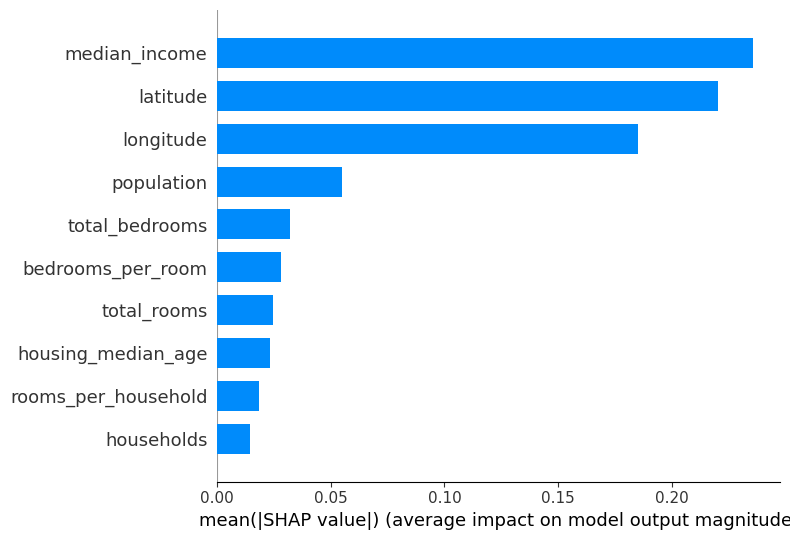

In [ ]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type='bar')

## Apply SHAP to Random Forest

100%|===================| 4121/4128 [08:17<00:00]       

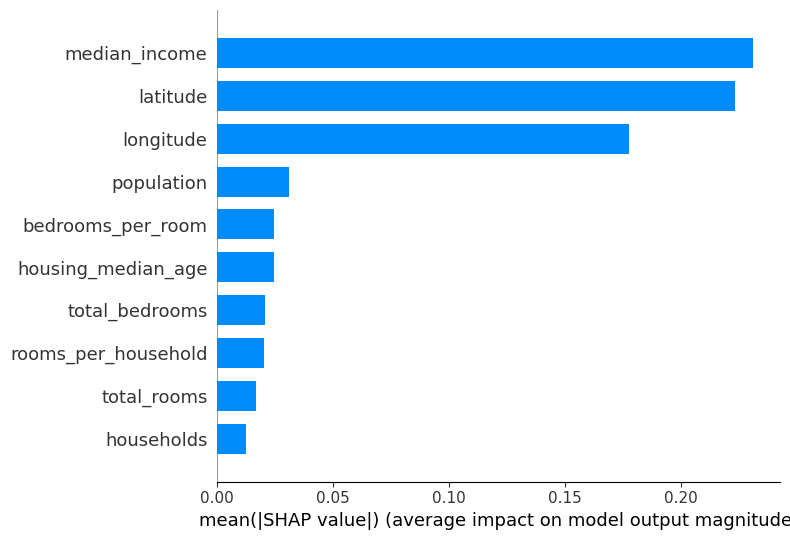

In [ ]:
explainer_rf = shap.Explainer(rf, X_train)
shap_values_rf = explainer_rf(X_test)
shap.summary_plot(shap_values_rf, X_test, plot_type='bar')

## Model Ensembling

In [ ]:
xgb_preds = xgb.predict(X_test)
rf_preds = rf.predict(X_test)
ensemble_preds = (xgb_preds + rf_preds) / 2

##  Model Evaluation

In [ ]:
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
ensemble_r2 = r2_score(y_test, ensemble_preds)
print(f"Hybrid RMSE: {ensemble_rmse:.6f}")
print(f"Hybrid R²: {ensemble_r2:.6f}")


Hybrid RMSE: 0.229790
Hybrid R²: 0.835603


**Observation:**

From the metric results, the hybrid model emerges to contain highest R² (0.835603) with the lowest RMSE( 0.229790) implying it is the best model to apply in the prediction of the house prices.

## Plotting the R² and RMSE for the Models

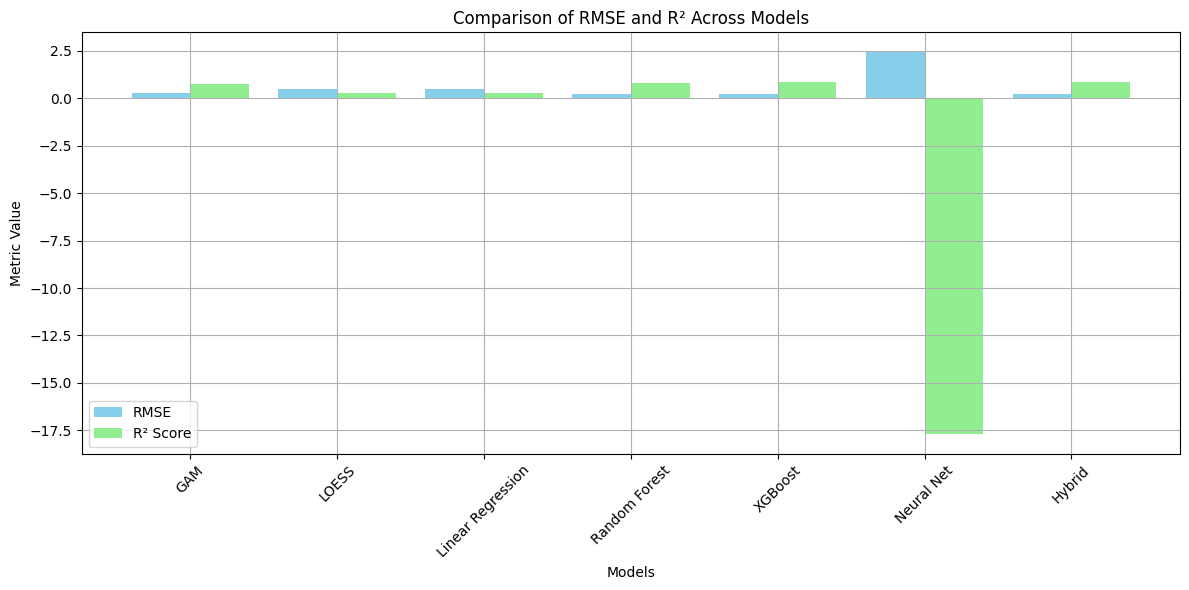

In [ ]:
models = ['GAM', 'LOESS', 'Linear Regression','Random Forest', 'XGBoost', 'Neural Net', 'Hybrid']
rmse_values = [0.280643, 0.488468, 0.488468,0.237625, 0.234269, 2.464492, 0.229923]
r2_values = [0.757333, 0.264850, 0.264850,0.826025, 0.830905, -17.713631, 0.835413]
x = np.arange(len(models))
bar_width = 0.4
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, rmse_values, width=bar_width, color='skyblue', label='RMSE')
plt.bar(x + bar_width/2, r2_values, width=bar_width, color='lightgreen', label='R² Score')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Comparison of RMSE and R² Across Models')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Residuals Distribution

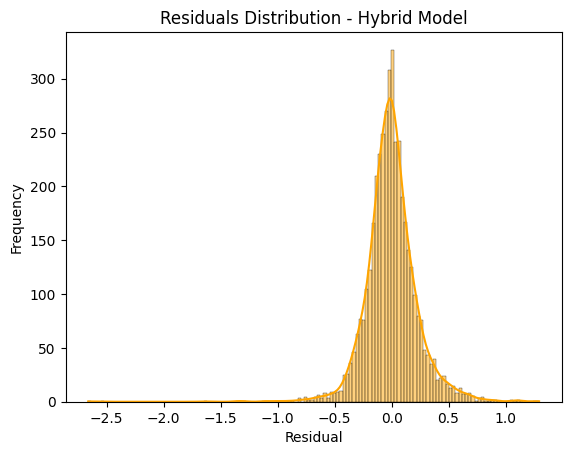

In [ ]:
residuals = y_test - ensemble_preds
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residuals Distribution - Hybrid Model")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

**Observed**

The predicted price and actual price are normaly distributed because most of the residual errors are around Zero.

## Save the Models

In [ ]:
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)
